<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

AttributeError: module 'pandas' has no attribute 'dropna'

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series(data=[100, 200, 300, 400, 500, 600], index=['tom', 'bob', 'nancy', 'dan', 'eric', 2])
# or
ser = pd.Series([100, 'foo', 300, 'bar', 500, 600], ['tom', 'bob', 'nancy', 'dan', 'eric', 2])

In [3]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
2        600
dtype: object

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric', 2], dtype='object')

In [5]:
print(ser.loc['nancy'])
print(ser.index[0])
print(ser[0:2])

300
tom
tom    100
bob    foo
dtype: object


In [6]:
print(ser['nancy'])
print(ser['eric'])
print(ser[2])
print(ser[[2]])
print(ser.loc['nancy'])

300
500
600
nancy    300
dtype: object
300


In [7]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [8]:
ser.iloc[4]

500

In [9]:
'bob' in ser

True

In [10]:
if('bob' in ser):
    print(ser['bob'])

foo


In [11]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
2        600
dtype: object

In [12]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
2          1200
dtype: object

In [13]:
ser['nancy'] ** 2

90000

In [14]:
ser ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [15]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [16]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [17]:
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [18]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [19]:
df.columns

Index(['one', 'two'], dtype='object')

In [20]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [21]:
nd = pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])
nd

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [22]:
data = [{'alex': 1, 'joe': 2, 'ema' : 4.0}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [23]:
pd.DataFrame(data)

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,4.0,2.0
1,NaN,20.0,10.0,5.0,NaN


In [24]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,4.0,2.0
red,NaN,20.0,10.0,5.0,NaN


In [25]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [26]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [27]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [44]:
df['one']['apple']

100.0

In [28]:
df.loc['apple']

one    100.0
two    111.0
Name: apple, dtype: float64

In [29]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [30]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [125]:
df.shape

(5, 4)

In [31]:
three = df.pop('three')

In [32]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [33]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [34]:
del df['two']

In [35]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [36]:
df.insert(1, 'copy_of_one', df['one'])
df

,one,copy_of_one,flag
apple,100.0,100.0,False
ball,200.0,200.0,False
cerill,NaN,NaN,False
clock,300.0,300.0,True
dancy,NaN,NaN,False


In [37]:
df['one_upper_half'] = df['one'][:2]
df

,one,copy_of_one,flag,one_upper_half
apple,100.0,100.0,False,100.0
ball,200.0,200.0,False,200.0
cerill,NaN,NaN,False,NaN
clock,300.0,300.0,True,NaN
dancy,NaN,NaN,False,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

### Please note that **you will need to download the dataset**. 

Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called **movielens** in your **Week-4-pandas** folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [38]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens/ml-20m

test


In [39]:
# This displays a lot of data - will need to clear output afterwards 
# !cat ./movielens/ml-20m/movies.csv

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [47]:
movies = pd.read_csv('../movies/ml-20m/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [48]:
movies.shape

(27278, 3)

In [52]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('../movies/ml-20m/tags.csv', sep=',')
tags.head(15)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


In [53]:
tags.shape

(465564, 4)

In [55]:
ratings = pd.read_csv('../movies/ml-20m/ratings.csv', sep=',', parse_dates=['timestamp'])

In [59]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [60]:
ratings.shape

(20000263, 3)

In [61]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

KeyError: 'timestamp'

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [62]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [63]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [64]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [65]:
row_0['userId']

18

In [66]:
'rating' in row_0

False

In [67]:
row_0.name

0

In [68]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [69]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [70]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [71]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [72]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [73]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [74]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [75]:
ratings['rating'].mean()

3.5255285642993797

In [76]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [77]:
ratings['rating'].min()

0.5

In [78]:
ratings['rating'].max()

5.0

In [79]:
ratings['rating'].std()

1.051988919275684

In [80]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [81]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [82]:
filter_1 = ratings['rating'] >= 5
filter_1.any()

True

In [83]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [84]:
movies.shape

(27278, 3)

In [85]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

That's nice! No NULL values!

In [86]:
ratings.shape

(20000263, 3)

In [87]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

That's nice! No NULL values!

In [88]:
tags.shape

(465564, 3)

In [89]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

In [90]:
tags = tags.dropna()

In [91]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [92]:
tags.shape

(465548, 3)

That's nice! No NULL values! Notice the number of lines have decreased.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52709906d8>]],
      dtype=object)

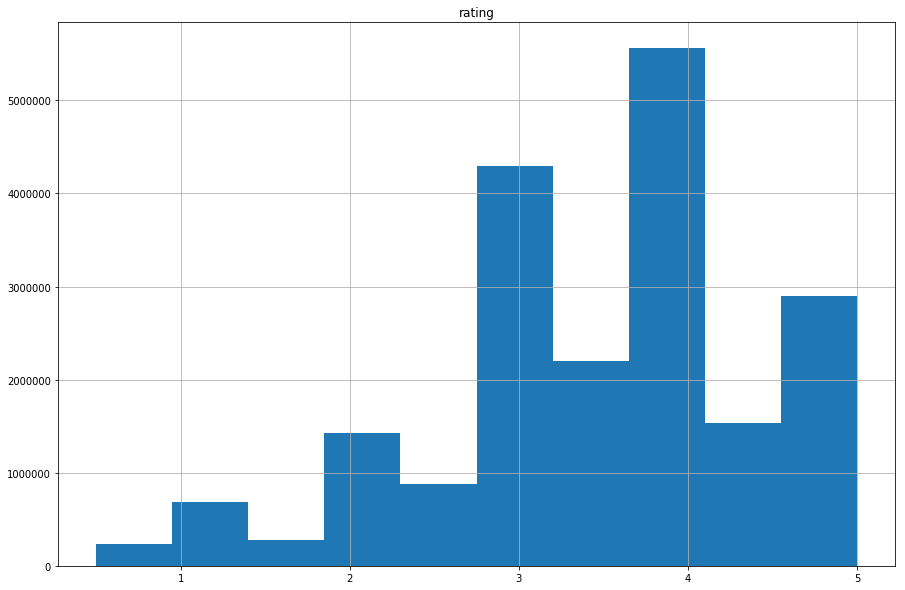

In [93]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

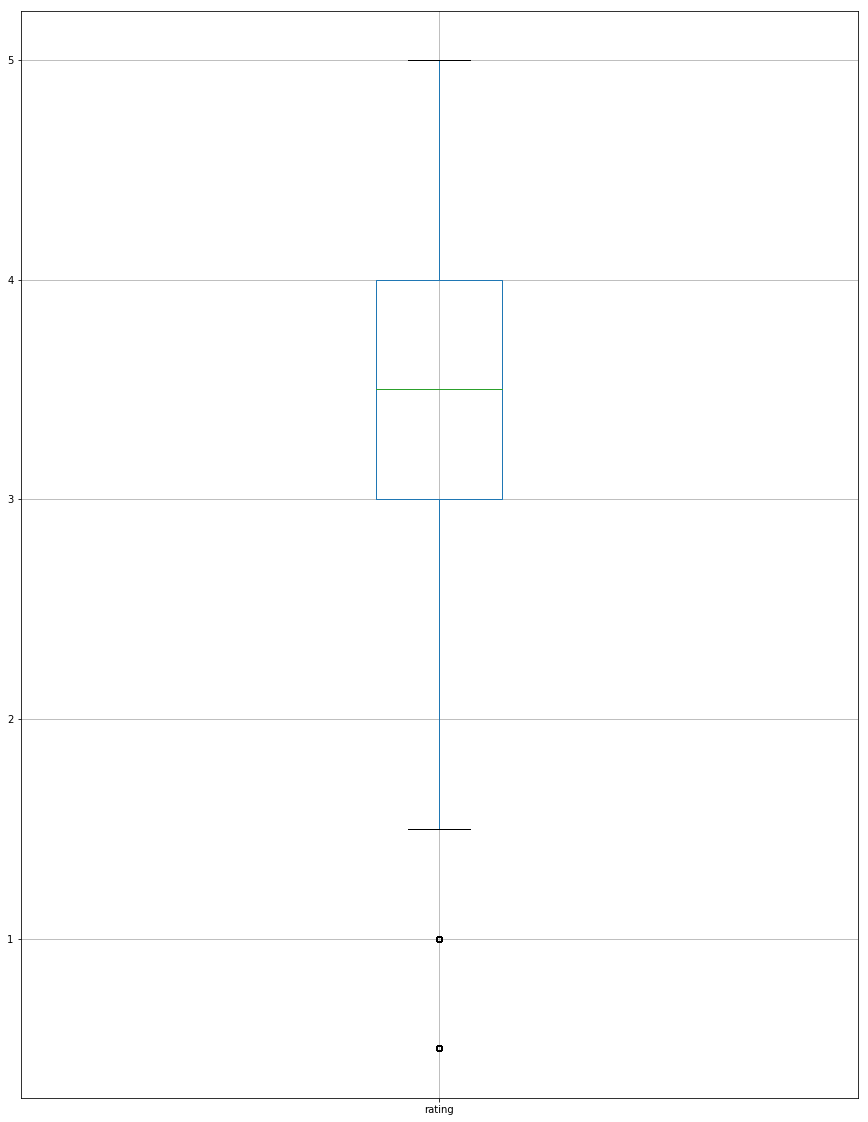

In [94]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [95]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [96]:
movies[['title','genres']].head(10)

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
5,Heat (1995),Action|Crime|Thriller
6,Sabrina (1995),Comedy|Romance
7,Tom and Huck (1995),Adventure|Children
8,Sudden Death (1995),Action
9,GoldenEye (1995),Action|Adventure|Thriller


In [97]:
ratings[1000:1010]

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0
1005,11,586,4.0
1006,11,587,4.5
1007,11,588,5.0
1008,11,589,4.5
1009,11,592,4.5


In [98]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

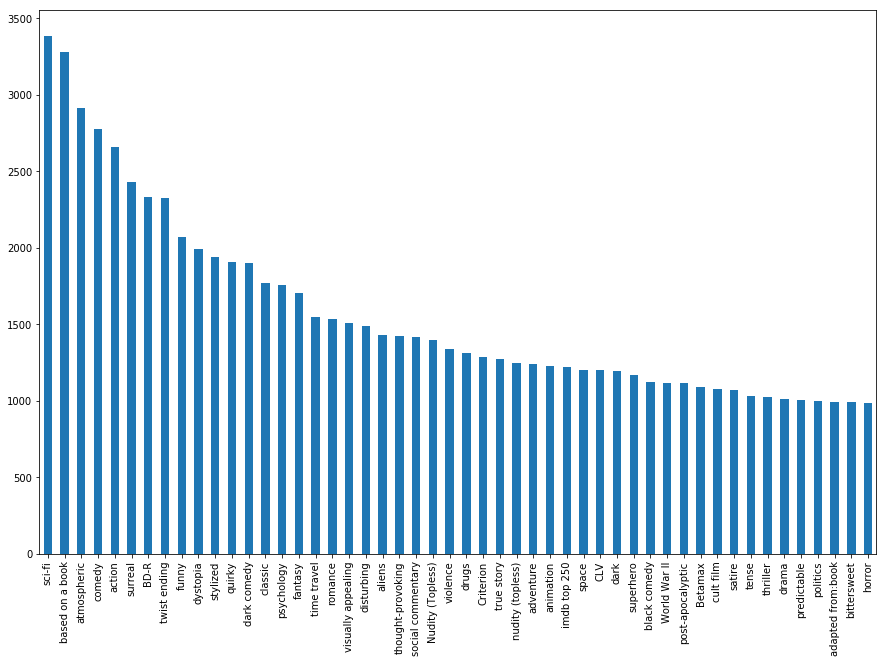

In [99]:
tag_counts[:50].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [100]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [101]:
ratings[['movieId','rating']][:10]

,movieId,rating
0,2,3.5
1,29,3.5
2,32,3.5
3,47,3.5
4,50,3.5
5,112,3.5
6,151,4.0
7,223,4.0
8,253,4.0
9,260,4.0


In [102]:
ratings_avg = ratings[['movieId','rating']].groupby('movieId').mean()

In [103]:
ratings_avg

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592
6,3.834930
7,3.366484
8,3.142049
9,3.004924


In [104]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
588,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
590,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
604,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [105]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [106]:
movie_ratings = pd.merge(movies, ratings_avg, on='movieId')

In [107]:
movie_ratings[['title','rating']]

,title,rating
0,Toy Story (1995),3.921240
1,Jumanji (1995),3.211977
2,Grumpier Old Men (1995),3.151040
3,Waiting to Exhale (1995),2.861393
4,Father of the Bride Part II (1995),3.064592
5,Heat (1995),3.834930
6,Sabrina (1995),3.366484
7,Tom and Huck (1995),3.142049
8,Sudden Death (1995),3.004924
9,GoldenEye (1995),3.430029


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [108]:
ratings_count = ratings[['movieId','rating']].groupby('movieId').count()
ratings_count

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
6,23899
7,12961
8,1415
9,3960


In [109]:
movie_ratings_count = pd.merge(movie_ratings, ratings_count, on='movieId')
movie_ratings_count

,movieId,title,genres,rating_x,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161
5,6,Heat (1995),Action|Crime|Thriller,3.834930,23899
6,7,Sabrina (1995),Comedy|Romance,3.366484,12961
7,8,Tom and Huck (1995),Adventure|Children,3.142049,1415
8,9,Sudden Death (1995),Action,3.004924,3960
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029,29005


In [110]:
is_popularly_rated = movie_ratings_count['rating_y'] >= 1000
movie_ratings_count[is_popularly_rated].sort_values(by='rating_x',ascending=False).head()

,movieId,title,genres,rating_x,rating_y
315,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.446990,63366
843,858,"Godfather, The (1972)",Crime|Drama,4.364732,41355
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.334372,47006
523,527,Schindler's List (1993),Drama|War,4.310175,50054
1195,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.275641,27398


In [111]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


In [112]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [113]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

MemoryError: 

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [ ]:
tags.head()

In [ ]:
movies.head()

In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggregation, merging, and filters to get useful analytics
</p>

In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

In [ ]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

In [ ]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

In [ ]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [ ]:
movies.head()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
movie_genres

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [ ]:
movie_genres['movieId'] = movies['movieId']

In [ ]:
movie_genres.tail()

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [ ]:
tags = pd.read_csv('./movielens/ml-20m/tags.csv', sep=',')

In [ ]:
tags.dtypes

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [ ]:
tags.head(5)

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [ ]:

tags['parsed_time'].dtype

In [ ]:
tags.head(2)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie Ratings related to the Year of Launch?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

In [ ]:
joined['year'] = joined['year'].str[0:4]

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average['year'] = yearly_average['year'].str[0:4]
yearly_average = yearly_average[100:-2]
yearly_average[-20:]

In [ ]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the box office movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>

In [ ]:
import pandas as pd
ser = pd.Series([100, 200, 300, 400, 500], index = ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [ ]:
ser

In [ ]:
ser['tom']

In [ ]:
ser[['tom','bob']]

In [ ]:
ser[[0,1]]

In [ ]:
ser.loc[['tom','bob']]

In [ ]:
ser.iloc[[0,1]]

In [ ]:
ser[[0,1]]